# Multilayer Neural Network(Make-Moon Dataset)

## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:
Random_State=2020

## Import Dataset

In [3]:
def Import_Data():
    X,y=datasets.make_moons(n_samples=1000,shuffle=True,noise=0.2,random_state=Random_State)
    df=pd.DataFrame(X,columns=["A","B"])
    df["y"]=y
    return df

## Train Test Split

In [4]:
def Train_Test(X,y):
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=Random_State)
    return X_train,X_test,y_train,y_test

## DataFrame To Store Results

In [5]:
Result_df=pd.DataFrame(columns=["Dimention of hidden layer","Learning Rate","Regularization","n_Epoch",
                                "Train_Accuracy","Test Accuracy","Comment"])

In [6]:
#To store result in the dataframe
def Save_Result(hidden_layer,Learning_Rate,Regularization,n_Epoch,Train_Accuracy,Test_Accuracy):
    global Result_df
    Remark=input("Please Enter Remark : ")
    result={"Dimention of hidden layer":hidden_layer,"Learning Rate":Learning_Rate,
            "Regularization":Regularization,"n_Epoch":n_Epoch,
                                "Train_Accuracy":Train_Accuracy,
                                "Test Accuracy":Test_Accuracy,"Comment":Remark}
    Result_df=Result_df.append(result,ignore_index=True)
    print("Data Saved")
    return True

## Visualisation

In [7]:
def Plot_Data(X):
    sns.scatterplot(x=X.A,y=X.B,hue=data.iloc[:,-1])
    plt.show()
    return 

def Plot_Compare(data):
    fig, ax=plt.subplots(ncols=2,figsize=(10,5))
#     Plot_Data(train_y_pred.drop("y",axis=1))
    sns.scatterplot(x=data.A,y=data.B,hue=data.y,ax=ax[0])
    plt.title("Predicted Data")
    sns.scatterplot(x=data.A,y=data.B,hue=data.y_hat,ax=ax[1])
    plt.show()
    return 

def Show_Loss_Graph(loss):
    keys=list(loss.keys())
    values=list(loss.values())
    plt.xlabel("n Epoch")
    plt.ylabel("Loss")
    print("Starting Loss : ",values[0])
    print("Ending Loss :",values[-1])
    sns.lineplot(x=keys,y=values)
    return 

## Predicting results based on model

In [8]:
def Predict_Result(model,X):
    
    #Input X 
    #Model
    
    W1,B1,W2,B2,W3,B3,W4,B4=model["W1"],model["B1"],model["W2"],model["B2"],model["W3"], \
                            model["B3"],model["W4"],model["B4"]
    #Layer 1
    Z1=X.dot(W1)+B1
    A1=np.tanh(Z1)
    
    #Layer 2
    Z2=A1.dot(W2)+B2
    A2=np.tanh(Z2)
    
    #Layer 3
    Z3=A2.dot(W3)+B3
    A3=np.tanh(Z3)
    
    #Layer 4
    Z4=A3.dot(W4)+B4
    Z4=np.exp(Z4)
    proba=Z4/np.sum(Z4,axis=1,keepdims=True)
    
    return np.argmax(proba,axis=1)
    

## Calculate Accuracy on whole dataset

In [9]:
def Calculate_Accuracy(model_,X_,y_):
    X=X_.copy()
    y=y_.copy()
    
    y_hat=Predict_Result(model_,X)
    Accuracy=accuracy_score(y,y_hat)
    print("Accuracy : ",Accuracy)
    X=pd.DataFrame(X,columns=["A","B"])
    X["y"]=y
    X["y_hat"]=y_hat
    return X,Accuracy

## Calculate loss on whole dataset

In [10]:
def Calculate_Loss_Function(model,X,y):
    # Function to calculate loss on whole dataset
    
    W1,B1,W2,B2,W3,B3,W4,B4=model["W1"],model["B1"],model["W2"],model["B2"],model["W3"], \
                            model["B3"],model["W4"],model["B4"]
    
    #Layer 1
    Z1=X.dot(W1)+B1
    A1=np.tanh(Z1)
    
    #Layer 2
    Z2=A1.dot(W2)+B2
    A2=np.tanh(Z2)
    
    #Layer 3
    Z3=A2.dot(W3)+B3
    A3=np.tanh(Z3)
    
    #Layer 4
    Z4=A3.dot(W4)+B4
    Z4=np.exp(Z4)
    A4=Z4/np.sum(Z4,axis=1,keepdims=True)
    
    #output Layer -> Softmax
    exp_op=np.exp(A4)
    
    #To calculate probabilities
    proba=exp_op/np.sum(exp_op,axis=1,keepdims=True)
    
    #Calculate Correct loss 
    log_proba=-np.log(proba[range(count),y])
    loss=np.sum(log_proba)
    
    #
    loss+=(lambda_/2) *(np.sum(np.square(W1))+np.sum(np.square(W2)))
    loss/=count
    return loss

## Train Model

In [17]:
def Train_Model(Layers,Model,X,y,Epoch=1000,Print_Loss=False):
    
    np.random.seed(Random_State)
    
    if Model==None:
        W1=np.random.randn(X.shape[1],Layers[0])/np.sqrt(Layers[0])
        B1=np.zeros((1,Layers[0]))
        
        W2=np.random.randn(Layers[0],Layers[1])/np.sqrt(Layers[1])
        B2=np.zeros((1,Layers[1]))
        
        W3=np.random.randn(Layers[1],Layers[2])/np.sqrt(Layers[2])
        B3=np.zeros((1,Layers[2]))
        
        W4=np.random.randn(Layers[2],Layers[3])/np.sqrt(Layers[3])
        B4=np.zeros((1,Layers[3]))
        
    else : 
        W1,B1,W2,B2,W3,B3,W4,B4=Model["W1"],model["B1"],model["W2"],model["B2"],model["W3"], \
                            model["B3"],model["W4"],model["B4"]
    
    
    assert((X.shape[1],Layers[0])==W1.shape) 
    "Shape of X={} does not match with W1={}".format((X.shape[1],Layers[0]),W1.shape)
    Model={}
    
    for i in range(Epoch):
        ########### Forward Propagation ###########
        #Layer 1
        Z1=X.dot(W1)+B1
        A1=np.tanh(Z1)
        assert(Z1.shape==A1.shape) ,"Shape of Z1 and A1 does not match"

        #Layer 2
        Z2=A1.dot(W2)+B2
        A2=np.tanh(Z2)
        assert(Z2.shape==A2.shape) ,"Shape of Z2 and A2 does not match"


        #Layer 3
        Z3=A2.dot(W3)+B3
        A3=np.tanh(Z3)
        assert(Z3.shape==A3.shape), "Shape of Z3 and A3 does not match"


        #Layer 4
        Z4=A3.dot(W4)+B4
        Z4=np.exp(Z4)
        proba=Z4/np.sum(Z4,axis=1,keepdims=True)
        assert(Z4.shape==proba.shape) ,"Shape of Z4 and proba does not match"


        ########### Backward Propagation ###########
        #Layer 4
        dZ4=proba
        dZ4[range(count),y]=-1

        dW4=(1/count)*(A3.T).dot(dZ4)
        
        assert(dW4.shape==W4.shape) ,"Shape of dW4={} and W4={} does not match".format(dW4.shape, W4.shape)
        
        dB4=(1/count)*np.sum(dZ4,axis=0,keepdims=True)

        #Layer 3
        dA3=dZ4.dot(W4.T)

        dZ3=dA3*(1-A3**2)

        dW3=(1/count)*(A2.T).dot(dZ3)
        assert(dW3.shape==W3.shape) ,"Shape of dW3 and W3 does not match"
        

        dB3=(1/count)*np.sum(dZ3,axis=0,keepdims=0)

        # Layer 2

        dA2=dZ3.dot(W3.T)

        dZ2=dA2*(1-A2**2)

        dW2=(1/count)*(A1.T).dot(dZ2)
        
        assert(dW2.shape==W2.shape), "Shape of dW2 and W2 does not match"
        

        dB2=(1/count)*np.sum(dZ2,axis=0,keepdims=0)

        # Layer 1

        dA1=dZ2.dot(W2.T)

        dZ1=dA1*(1-A1**2)

        dW1=(1/count)*(X.T).dot(dZ1)
        
        assert(dW1.shape==W1.shape), "Shape of dW1 and W1 does not match"
        
        dB1=(1/count)*np.sum(dZ1,axis=0,keepdims=0)
        


        # Regularization

        dW4+=lambda_*dW4
        dW3+=lambda_*dW3
        dW2+=lambda_*dW2
        dW1+=lambda_*dW1

        #Gradient Descent

        W4-=Learning_Rate*dW4
        W3-=Learning_Rate*dW3
        W2-=Learning_Rate*dW2
        W1-=Learning_Rate*dW1


        # set model values 

        Model={"W4":W4,"B4":B4,
            "W3":W3,"B3":B3,
            "W2":W2,"B2":B2,
            "W1":W1,"B1":B1
              }
        if Print_Loss and i%1000==0:
            loss=Calculate_Loss_Function(Model,X,y)
            print("Loss after %i epoch is %f"%(i,loss))
            
            loss_dict[i]=loss
    
    loss=Calculate_Loss_Function(Model,X,y)
    print("Loss after %i epoch is %f"%(i,loss))

    loss_dict[i]=loss
    
    return Model 


## Main Function

In [12]:
def Main():
    Model=None
    model=Train_Model(Layers,Model,X_train.values,y_train.values,Epoch,True)
    print("Loss Graph")
    Show_Loss_Graph(loss_dict)
    print("Training Data")
    train_y_pred,train_acc=Calculate_Accuracy(model,X_train.values,y_train.values)
    print("Testing Data")
    test_y_pred,test_acc=Calculate_Accuracy(model,X_test.values,y_test.values)
    
    Plot_Compare(train_y_pred)
    Plot_Compare(test_y_pred)

    Save_Result(Layers,Learning_Rate,lambda_,Epoch,train_acc,test_acc)

In [13]:
Moon_Data=Import_Data()

In [14]:
X_train,X_test,y_train,y_test =Train_Test(Moon_Data.iloc[:,:-1],Moon_Data.iloc[:,-1])

### Parameters and Result

Loss after 0 epoch is 0.710277
Loss after 1000 epoch is 0.450762
Loss after 2000 epoch is 0.444603
Loss after 2999 epoch is 0.441894
Loss Graph
Starting Loss :  0.7102766184617111
Ending Loss : 0.44189367241937544
Training Data
Accuracy :  0.87125
Testing Data
Accuracy :  0.905


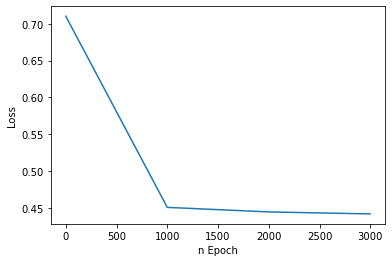

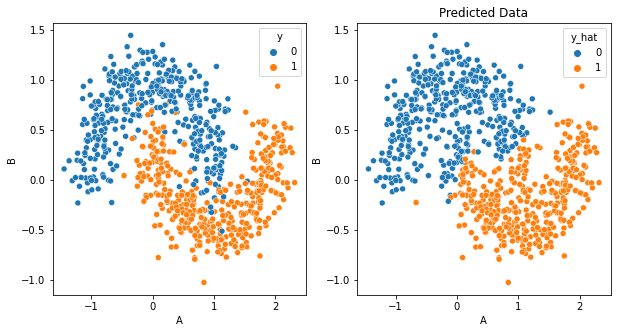

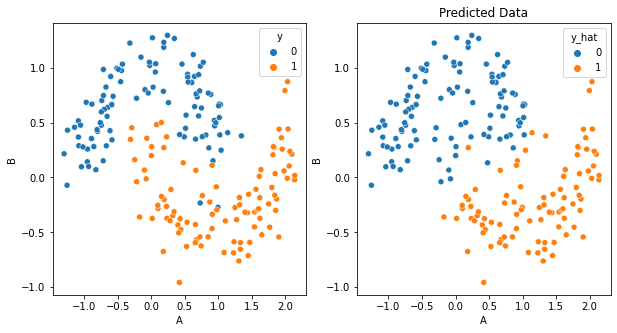

Please Enter Remark : With 5-5-4-2
Data Saved


In [119]:
loss_dict={}
count=len(X_train)
Layers=[5,5,4,2]
Learning_Rate=0.1
lambda_=0.0
Epoch=3000
Main()

### Parameters and Result

Loss after 0 epoch is 0.687075
Loss after 1000 epoch is 0.460967
Loss after 2000 epoch is 0.450760
Loss after 3000 epoch is 0.465762
Loss after 4000 epoch is 0.464512
Loss after 4999 epoch is 0.459512
Loss Graph
Starting Loss :  0.6870750587212623
Ending Loss : 0.45951168751822274
Training Data
Accuracy :  0.85375
Testing Data
Accuracy :  0.895


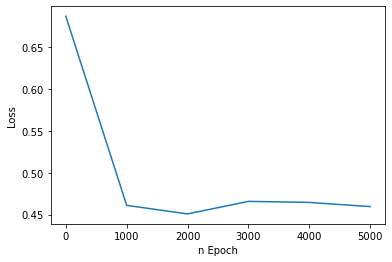

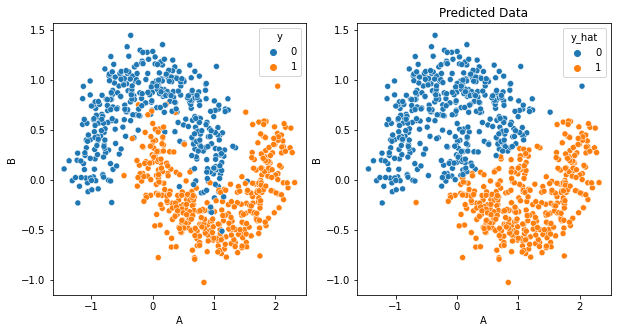

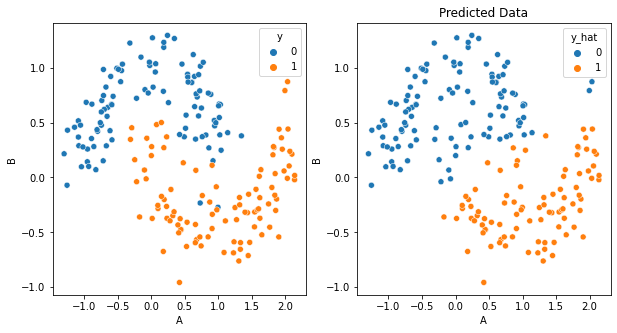

Please Enter Remark : Changes in Learning Rate, Lambda ,Epoch
Data Saved


In [21]:
loss_dict={}
count=len(X_train)
Layers=[7,5,3,2]
Learning_Rate=0.1
lambda_=0.000
Epoch=5000
Main()

### Parameters and Result

Loss after 0 epoch is 0.787413
Loss after 1000 epoch is 0.460523
Loss after 2000 epoch is 0.440252
Loss after 3000 epoch is 0.440662
Loss after 4000 epoch is 0.442805
Loss after 5000 epoch is 0.440919
Loss after 6000 epoch is 0.438336
Loss after 7000 epoch is 0.440654
Loss after 8000 epoch is 0.447287
Loss after 9000 epoch is 0.437051
Loss after 9999 epoch is 0.435540
Loss Graph
Starting Loss :  0.7874132014077401
Ending Loss : 0.4355399489159801
Training Data
Accuracy :  0.8775
Testing Data
Accuracy :  0.915


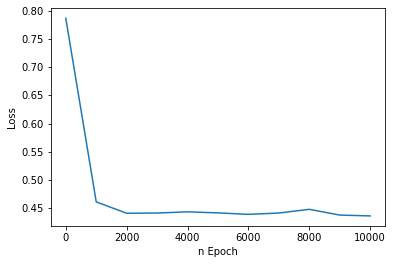

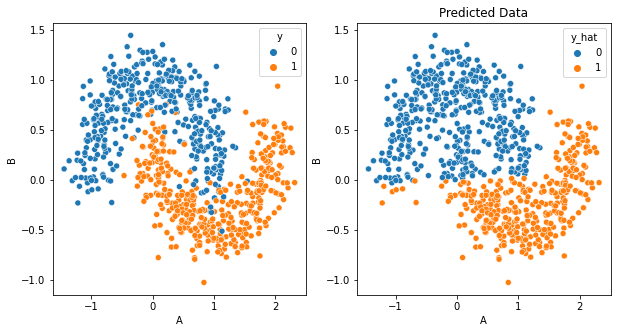

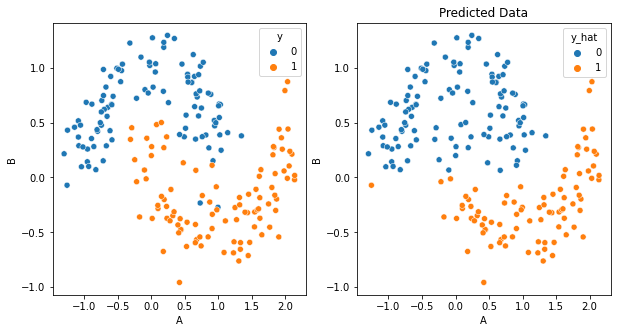

Please Enter Remark : Lambda and Number of neurons updated
Data Saved


In [24]:
loss_dict={}
count=len(X_train)
Layers=[7,7,5,2]
Learning_Rate=0.01
lambda_=0.000
Epoch=10000
Main()

### Parameters and Result

Loss after 0 epoch is 0.711350
Loss after 1000 epoch is 0.461463
Loss after 2000 epoch is 0.462916
Loss after 3000 epoch is 0.463114
Loss after 4000 epoch is 0.463154
Loss after 5000 epoch is 0.463027
Loss after 6000 epoch is 0.462702
Loss after 7000 epoch is 0.462482
Loss after 8000 epoch is 0.463254
Loss after 9000 epoch is 0.463202
Loss after 9999 epoch is 0.461664
Loss Graph
Starting Loss :  0.711350356624299
Ending Loss : 0.46166357336317726
Training Data
Accuracy :  0.8525
Testing Data
Accuracy :  0.895


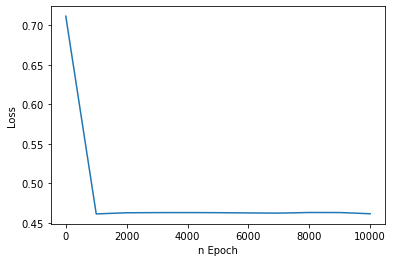

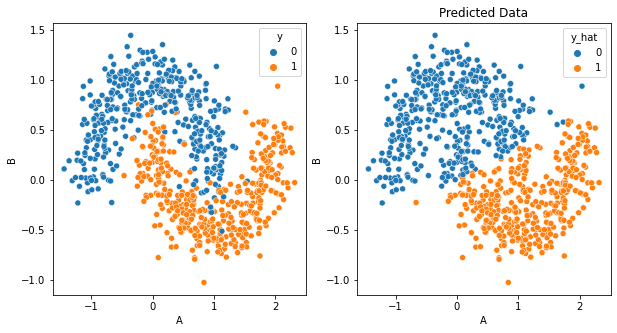

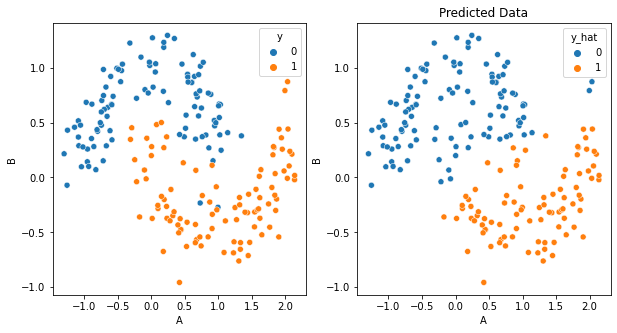

Please Enter Remark : Layers updated
Data Saved


In [29]:
loss_dict={}
count=len(X_train)
Layers=[5,5,4,2]
Learning_Rate=0.01
lambda_=0.01
Epoch=10000
Main()

### Parameters and Result

Loss after 0 epoch is 0.692175
Loss after 1000 epoch is 0.456644
Loss after 2000 epoch is 0.444607
Loss after 3000 epoch is 0.437126
Loss after 4000 epoch is 0.418362
Loss after 5000 epoch is 0.390960
Loss after 6000 epoch is 0.391221
Loss after 7000 epoch is 0.398223
Loss after 8000 epoch is 0.393608
Loss after 9000 epoch is 0.389716
Loss after 9999 epoch is 0.391468
Loss Graph
Starting Loss :  0.6921751125708223
Ending Loss : 0.3914675285886668
Training Data
Accuracy :  0.92375
Testing Data
Accuracy :  0.935


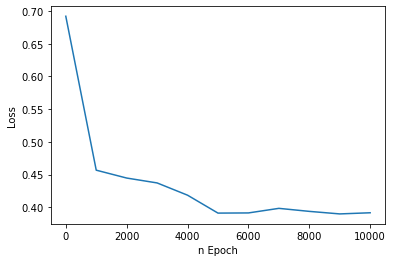

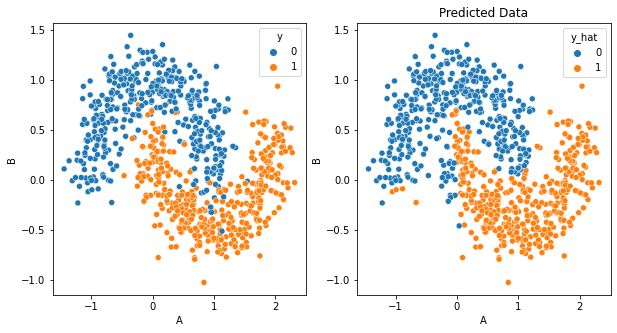

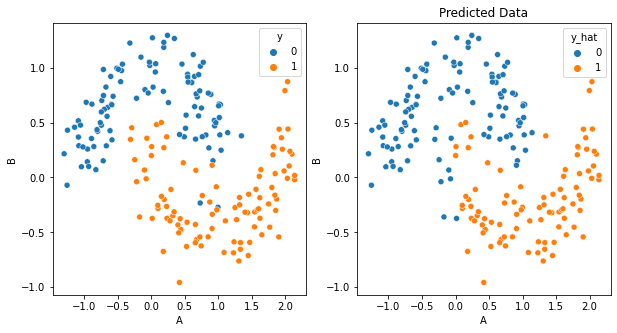

Please Enter Remark : Layer before output layer is updated
Data Saved


In [30]:
loss_dict={}
count=len(X_train)
Layers=[5,5,7,2]
Learning_Rate=0.01
lambda_=0.01
Epoch=10000
Main()

### Parameters and Result

Loss after 0 epoch is 0.781130
Loss after 1000 epoch is 0.440024
Loss after 2000 epoch is 0.434470
Loss after 3000 epoch is 0.399502
Loss after 4000 epoch is 0.398102
Loss after 5000 epoch is 0.395789
Loss after 6000 epoch is 0.403262
Loss after 7000 epoch is 0.387012
Loss after 8000 epoch is 0.397011
Loss after 9000 epoch is 0.395762
Loss after 9999 epoch is 0.398260
Loss Graph
Starting Loss :  0.7811297889993664
Ending Loss : 0.3982601585396266
Training Data
Accuracy :  0.915
Testing Data
Accuracy :  0.93


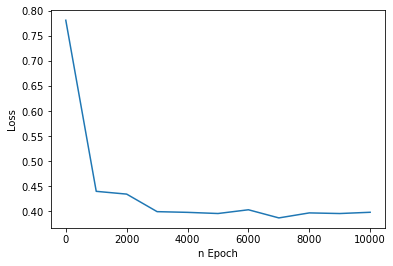

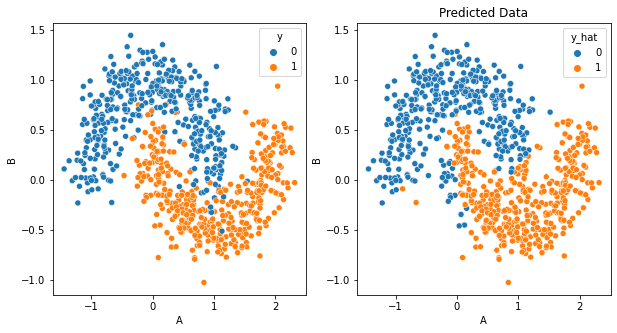

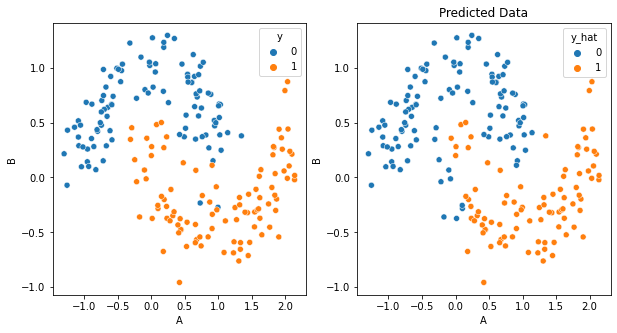

Please Enter Remark : Update Learning Rate
Data Saved


In [35]:
loss_dict={}
count=len(X_train)
Layers=[5,9,7,2]
Learning_Rate=0.02
lambda_=0.00
Epoch=10000
Main()

# Final Result

In [46]:
Result_df

,Dimention of hidden layer,Learning Rate,Regularization,n_Epoch,Train_Accuracy,Test Accuracy,Comment
0,"[7, 5, 3, 2]",0.01,0.001,10000,0.87875,0.920,Change in Hidden Layers
1,"[7, 5, 3, 2]",0.10,0.000,5000,0.85375,0.895,"Changes in Learning Rate, Lambda ,Epoch"
2,"[7, 7, 5, 2]",0.01,0.000,10000,0.87750,0.915,Lambda and Number of neurons updated
3,"[5, 5, 4, 2]",0.01,0.010,10000,0.85250,0.895,Layers updated
4,"[5, 5, 7, 2]",0.01,0.010,10000,0.92375,0.935,Final Model
5,"[5, 9, 7, 2]",0.02,0.000,10000,0.91500,0.930,Update Learning Rate
